In [1]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms
import os
from torch.utils.data import DataLoader, Dataset

/home/msouda/.pyenv/versions/3.9.18/envs/face_detection/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
class VisuMaskImageDataset(Dataset):
    def __init__(self, img_paths, mask_paths, pred_paths, dataset_dir = '/home/msouda/Datasets', transform=None):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.pred_paths = pred_paths
        self.transform = transform
        self.dataset_dir = dataset_dir

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]
        img_path = os.path.join(self.dataset_dir, img_path)
        mask_path = os.path.join(self.dataset_dir, mask_path)
        pred_path = self.pred_paths[idx]
        img_name = img_path.split('/')[-1]
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")
        pred = Image.open(pred_path).convert("L")
        
        x = self.transform(img)
        mask = self.transform(mask)
        mask = (((mask-mask.min())/(mask.max()-mask.min()))*2).long()
        pred = self.transform(pred)
        return x, mask, pred, img_path
    

In [26]:
#PARAMETRES A CHANGER

annotation_file = '/home/msouda/Datasets/new_synth_masks_ano_defocus/annotations.csv'
pred_dir = '/home/msouda/Workspace/clean/Masks'



preds = os.listdir(pred_dir)
df = pd.read_csv(annotation_file, header=None, names=['img_path', 'mask_path'])
df = df.assign(pred_name = df['img_path'].apply(lambda x: x.split('/')[-1].replace('.jpg', '.png'))).query('pred_name in @preds')
df['pred_path'] = df['mask_path'].apply(lambda x: os.path.join(pred_dir, '/'.join(x.split('/')[2:])))

img_paths = df['img_path'].values
mask_paths = df['mask_path'].values
pred_paths = df['pred_path'].values

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset = VisuMaskImageDataset(img_paths, mask_paths, pred_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

609 609 609


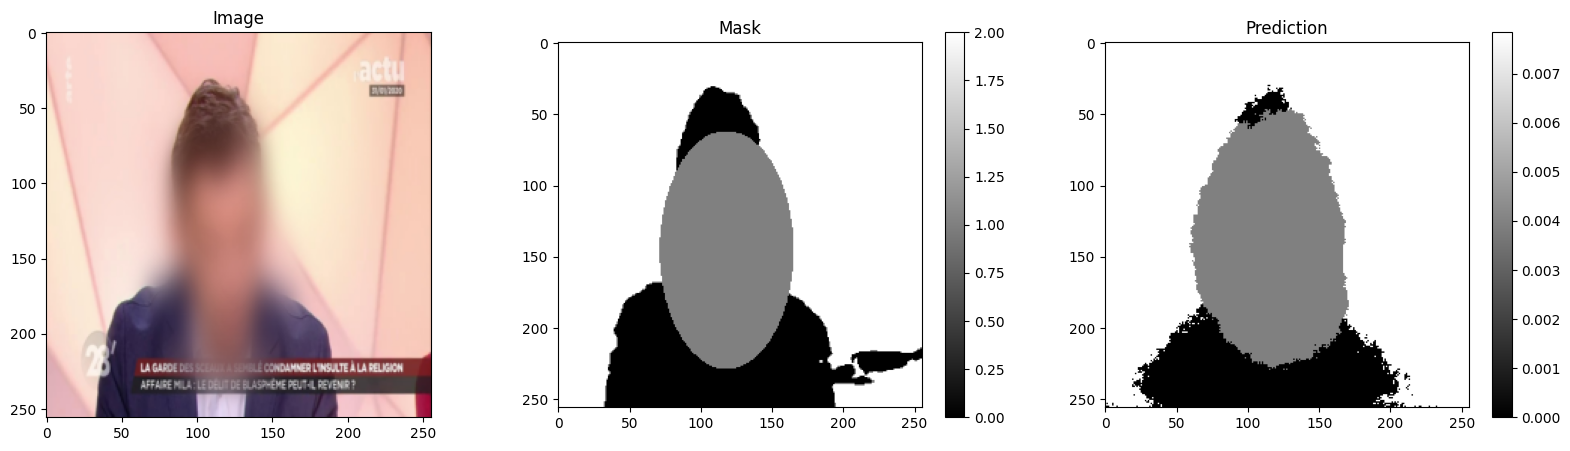

/home/msouda/Datasets/new_synth_anonymized/art_20200522T202950/art_20200522T202950_s2_f0.jpg
--------------------------------------


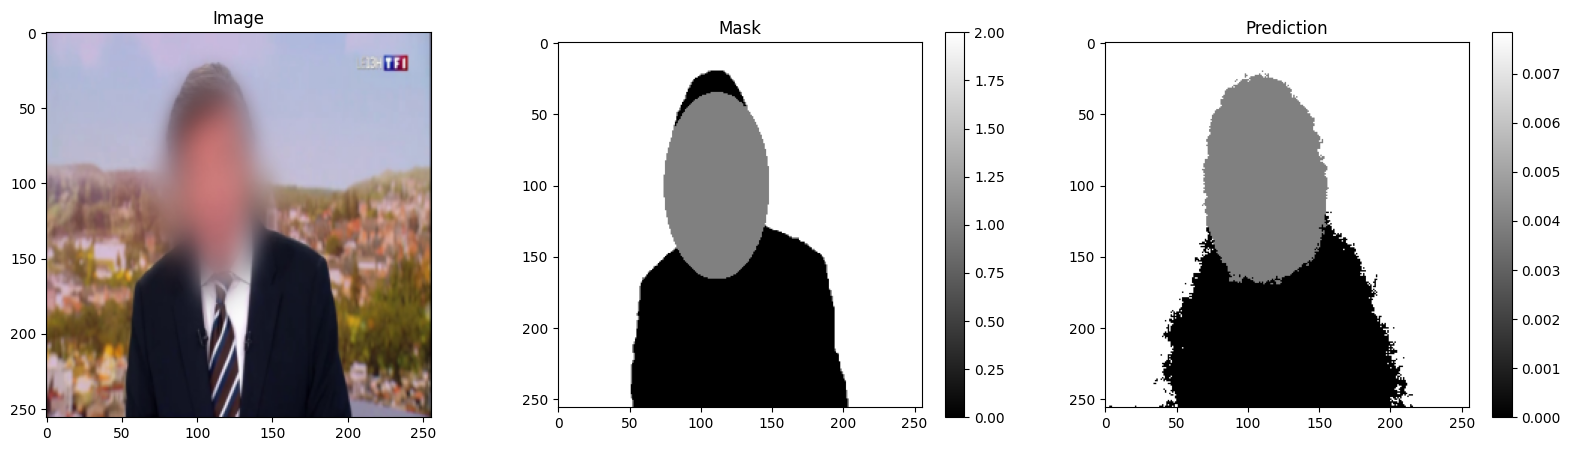

/home/msouda/Datasets/new_synth_anonymized/tf1_20191230T130026/tf1_20191230T130026_s2_f0.jpg
--------------------------------------


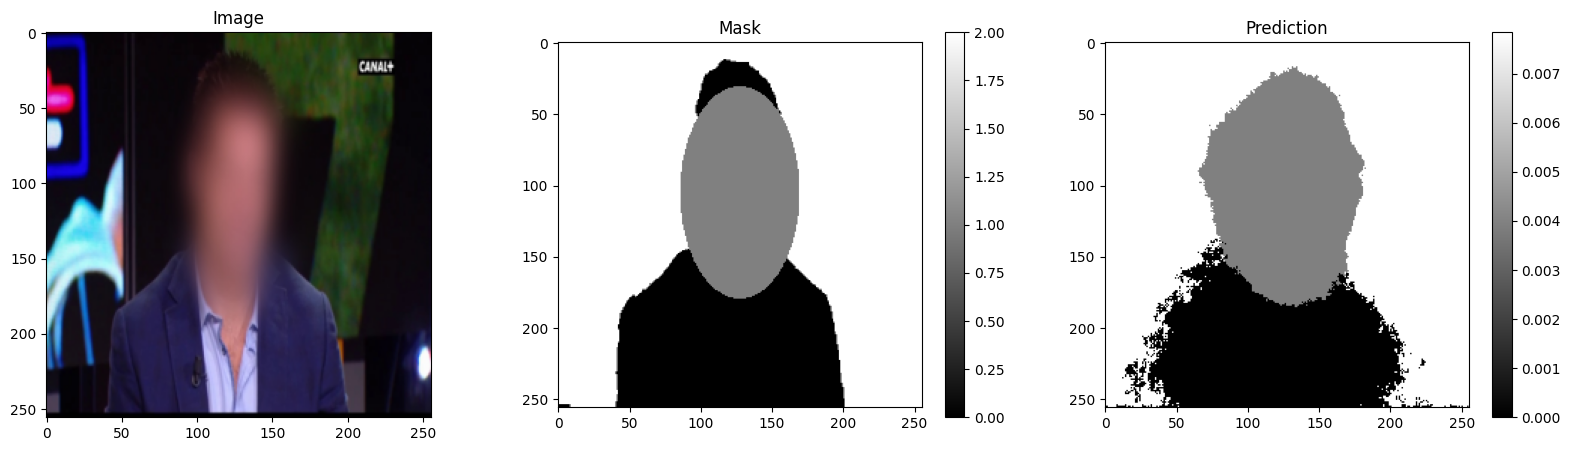

/home/msouda/Datasets/new_synth_anonymized/c+__20170409T142716/c+__20170409T142716_s2_f0.jpg
--------------------------------------


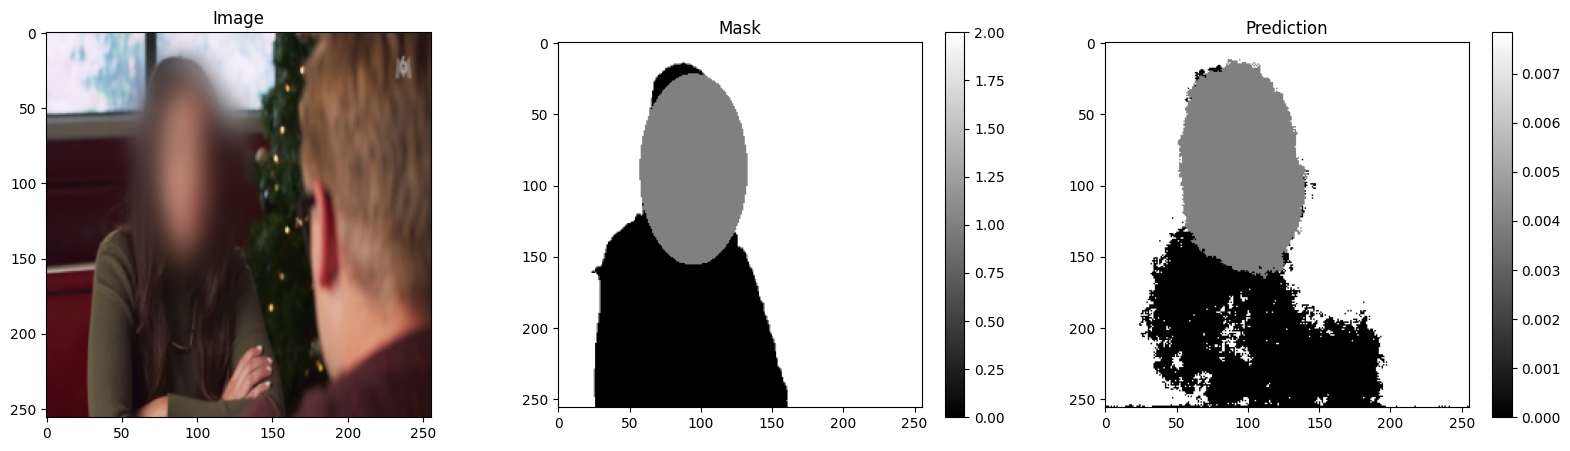

/home/msouda/Datasets/new_synth_anonymized/m6__20231229T173936/m6__20231229T173936_s2_f0.jpg
--------------------------------------


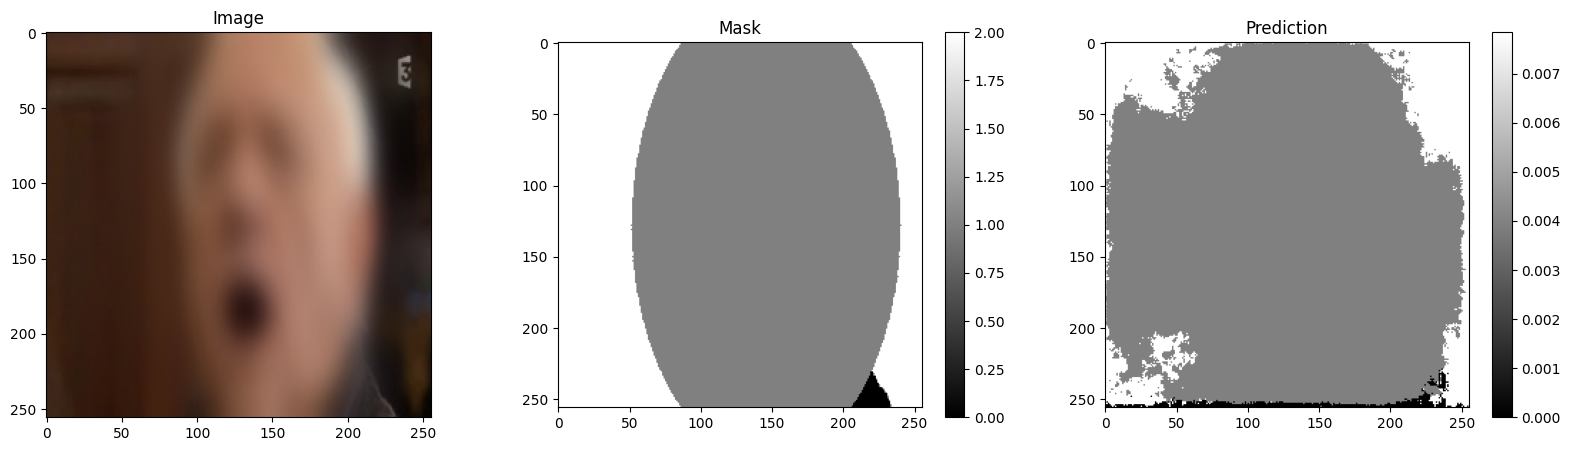

/home/msouda/Datasets/new_synth_anonymized/fr3_20110429T245356/fr3_20110429T245356_s1_f0.jpg
--------------------------------------


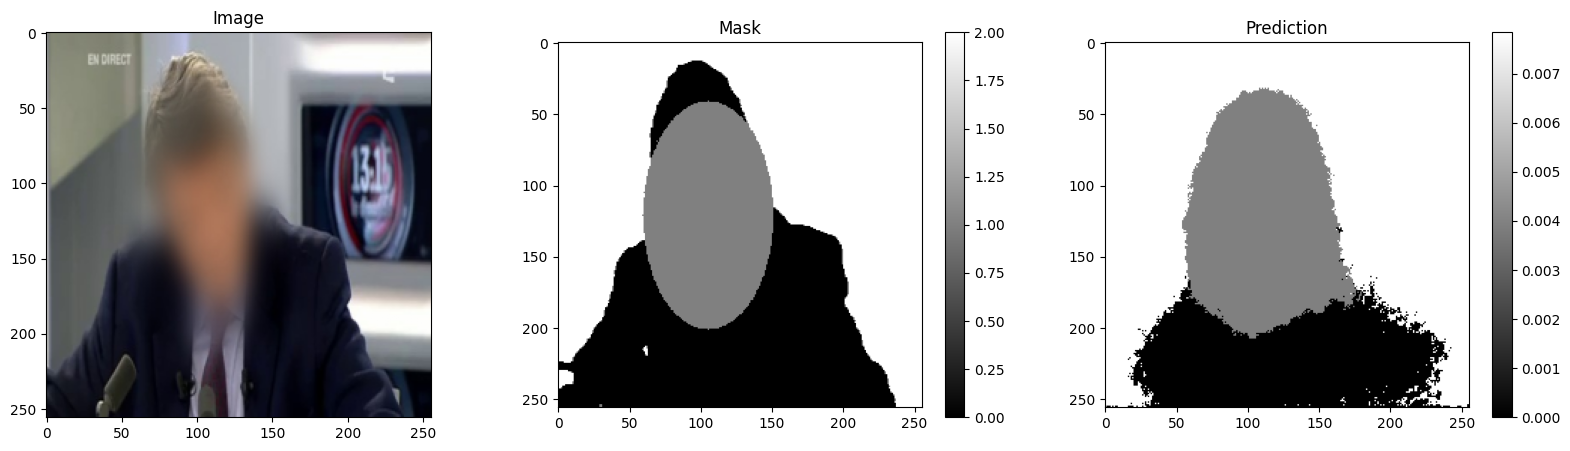

/home/msouda/Datasets/new_synth_anonymized/fr2_20110313T134144/fr2_20110313T134144_s2_f0.jpg
--------------------------------------


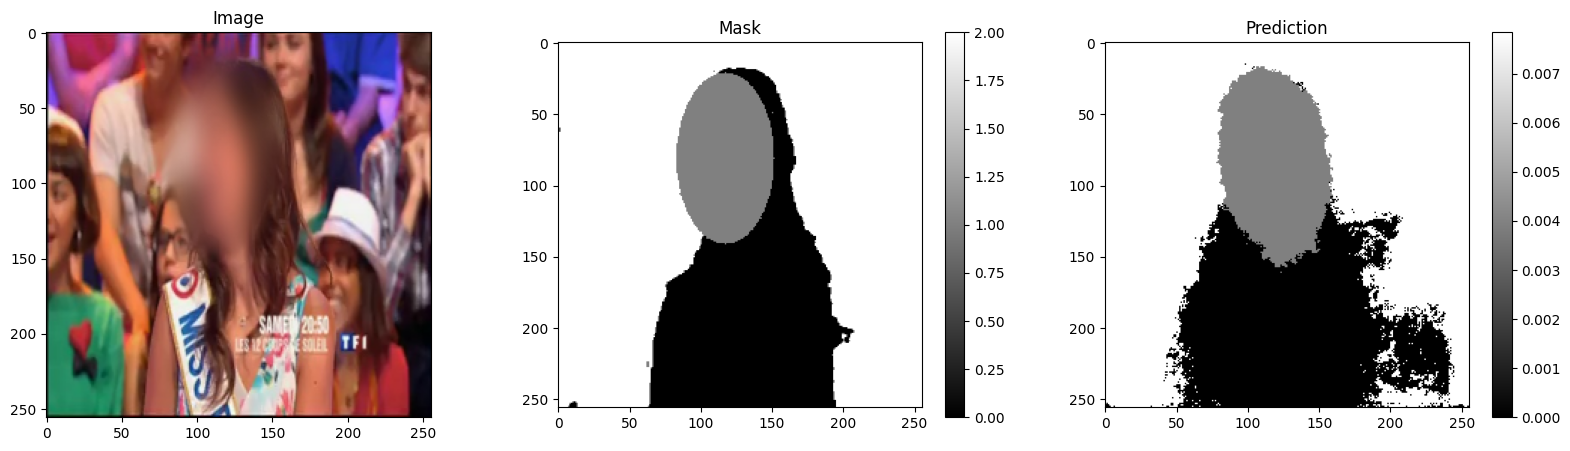

/home/msouda/Datasets/new_synth_anonymized/tf1_20130715T192546/tf1_20130715T192546_s1_f0.jpg
--------------------------------------


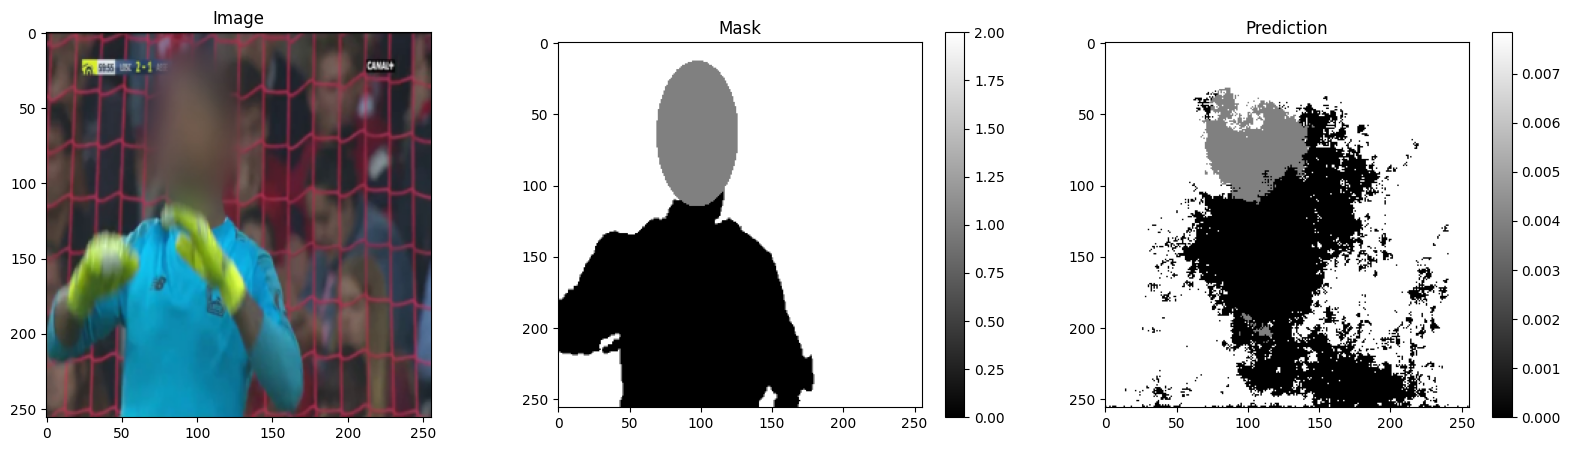

/home/msouda/Datasets/new_synth_anonymized/c+__20181006T181732/c+__20181006T181732_s3_f0.jpg
--------------------------------------


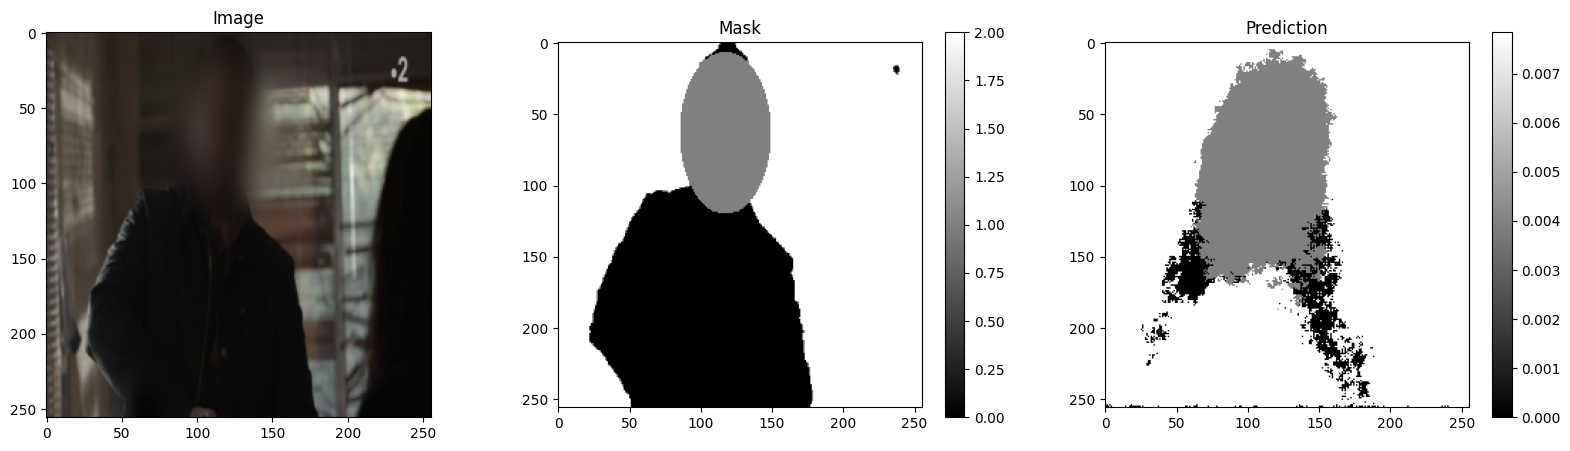

/home/msouda/Datasets/new_synth_anonymized/fr2_20210412T205710/fr2_20210412T205710_s1_f0.jpg
--------------------------------------


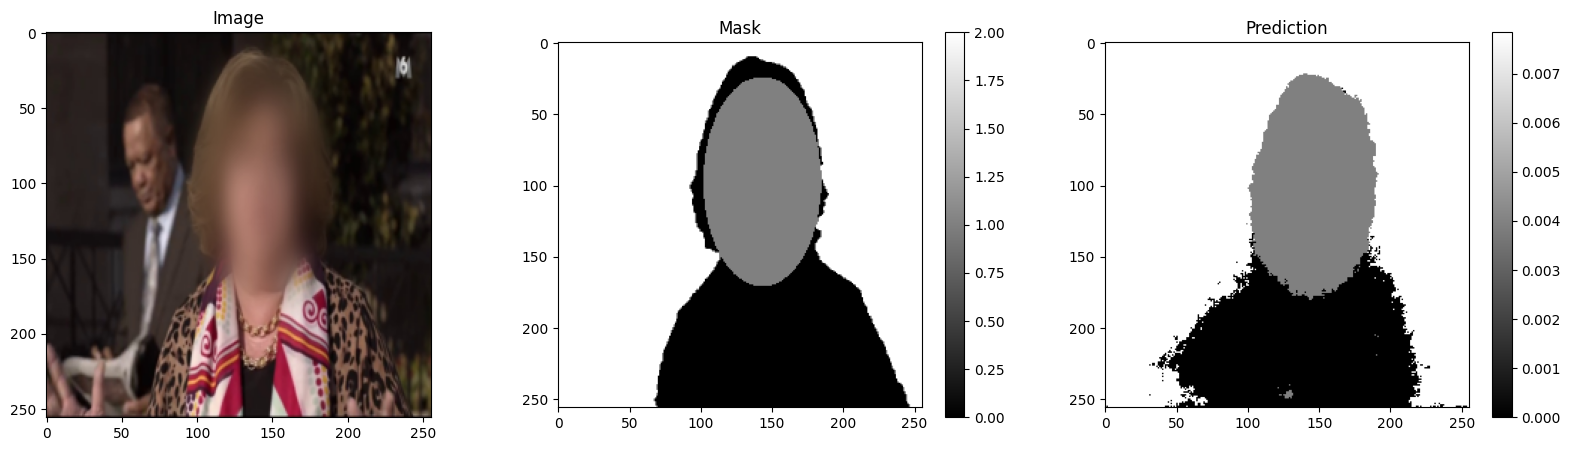

/home/msouda/Datasets/new_synth_anonymized/m6__20171023T160935/m6__20171023T160935_s2_f0.jpg
--------------------------------------


In [30]:
n_images = 10
for i, (x, mask, pred, img_path) in enumerate(dataloader):
    if i == n_images:
        break
    img_path = img_path[0]
    img_name = img_path.split('/')[-1]
    img = x[0].permute(1, 2, 0).numpy()
    mask = mask[0][0].numpy()
    pred = pred[0][0].numpy()
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(img)
    ax[0].set_title('Image')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Mask')
    ax[2].imshow(pred, cmap='gray')
    ax[2].set_title('Prediction')
    fig.colorbar(ax[1].imshow(mask, cmap='gray'), ax=ax[1])
    fig.colorbar(ax[2].imshow(pred, cmap='gray'), ax=ax[2])
    plt.show()
    plt.show()
    print(img_path)
    print('--------------------------------------')